In [6]:
library(dorothea)
library(dplyr)
library(Seurat)
library(tibble)
library(pheatmap)
library(tidyr)
library(viper)
library(SingleR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioco

In [30]:
T = readRDS('/PERSONALBIO/Work/Sc/Sc01/work/liujing_hsa/hsa_res05_re/2.recluster/all.rds/T_recluster_res0.3.sub.rds')

In [161]:
options(repr.plot.height =4,repr.plot.width = 4)

In [162]:
Idents(T) = 'SCT_snn_res.0.3'

In [167]:
library(cowplot)
library(ggsci)
library(ggplot2)

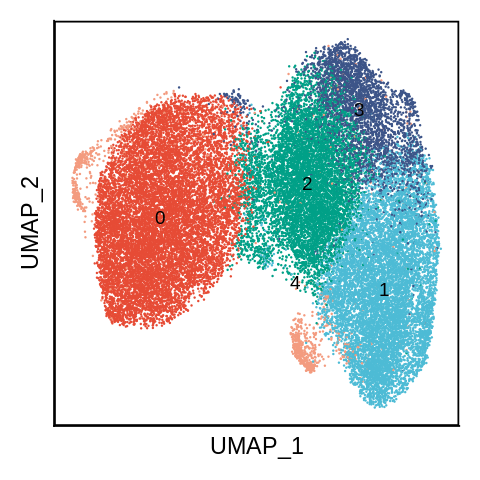

In [168]:
DimPlot(T, reduction = "umap",label = TRUE) +NoLegend()+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank())+ scale_color_npg()

In [169]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","umap1.pdf"),width =5, height = 5)
ggsave(paste0(outdir,"/","umap1.png"),width =5, height = 5)   

In [170]:
options(repr.plot.height =4,repr.plot.width = 6)

In [171]:
marker_genes = c('CD3D','CD4','NKG7','FCGR3A','CD8A','GZMK','GZMA','GZMB','IL7R','CCR7','LEF1','TCF7','SELL')

In [172]:
DefaultAssay(T) ='RNA'

In [173]:
options(repr.plot.height =3.5,repr.plot.width = 4.5)

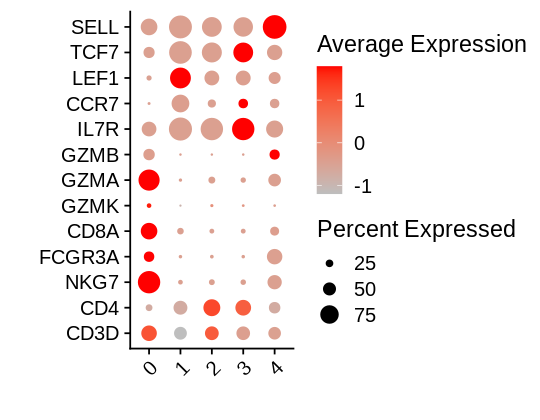

In [174]:
DotPlot(T, features =marker_genes,
             assay='RNA',cols = c('grey','red'))  + coord_flip()+RotatedAxis()+
  scale_x_discrete("")+scale_y_discrete("")

In [175]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","dotplot.pdf"),width =4.5, height = 3.5)
ggsave(paste0(outdir,"/","dotplot.png"),width =4.5, height = 3.5)   

In [179]:
options(repr.plot.height =12,repr.plot.width = 15)

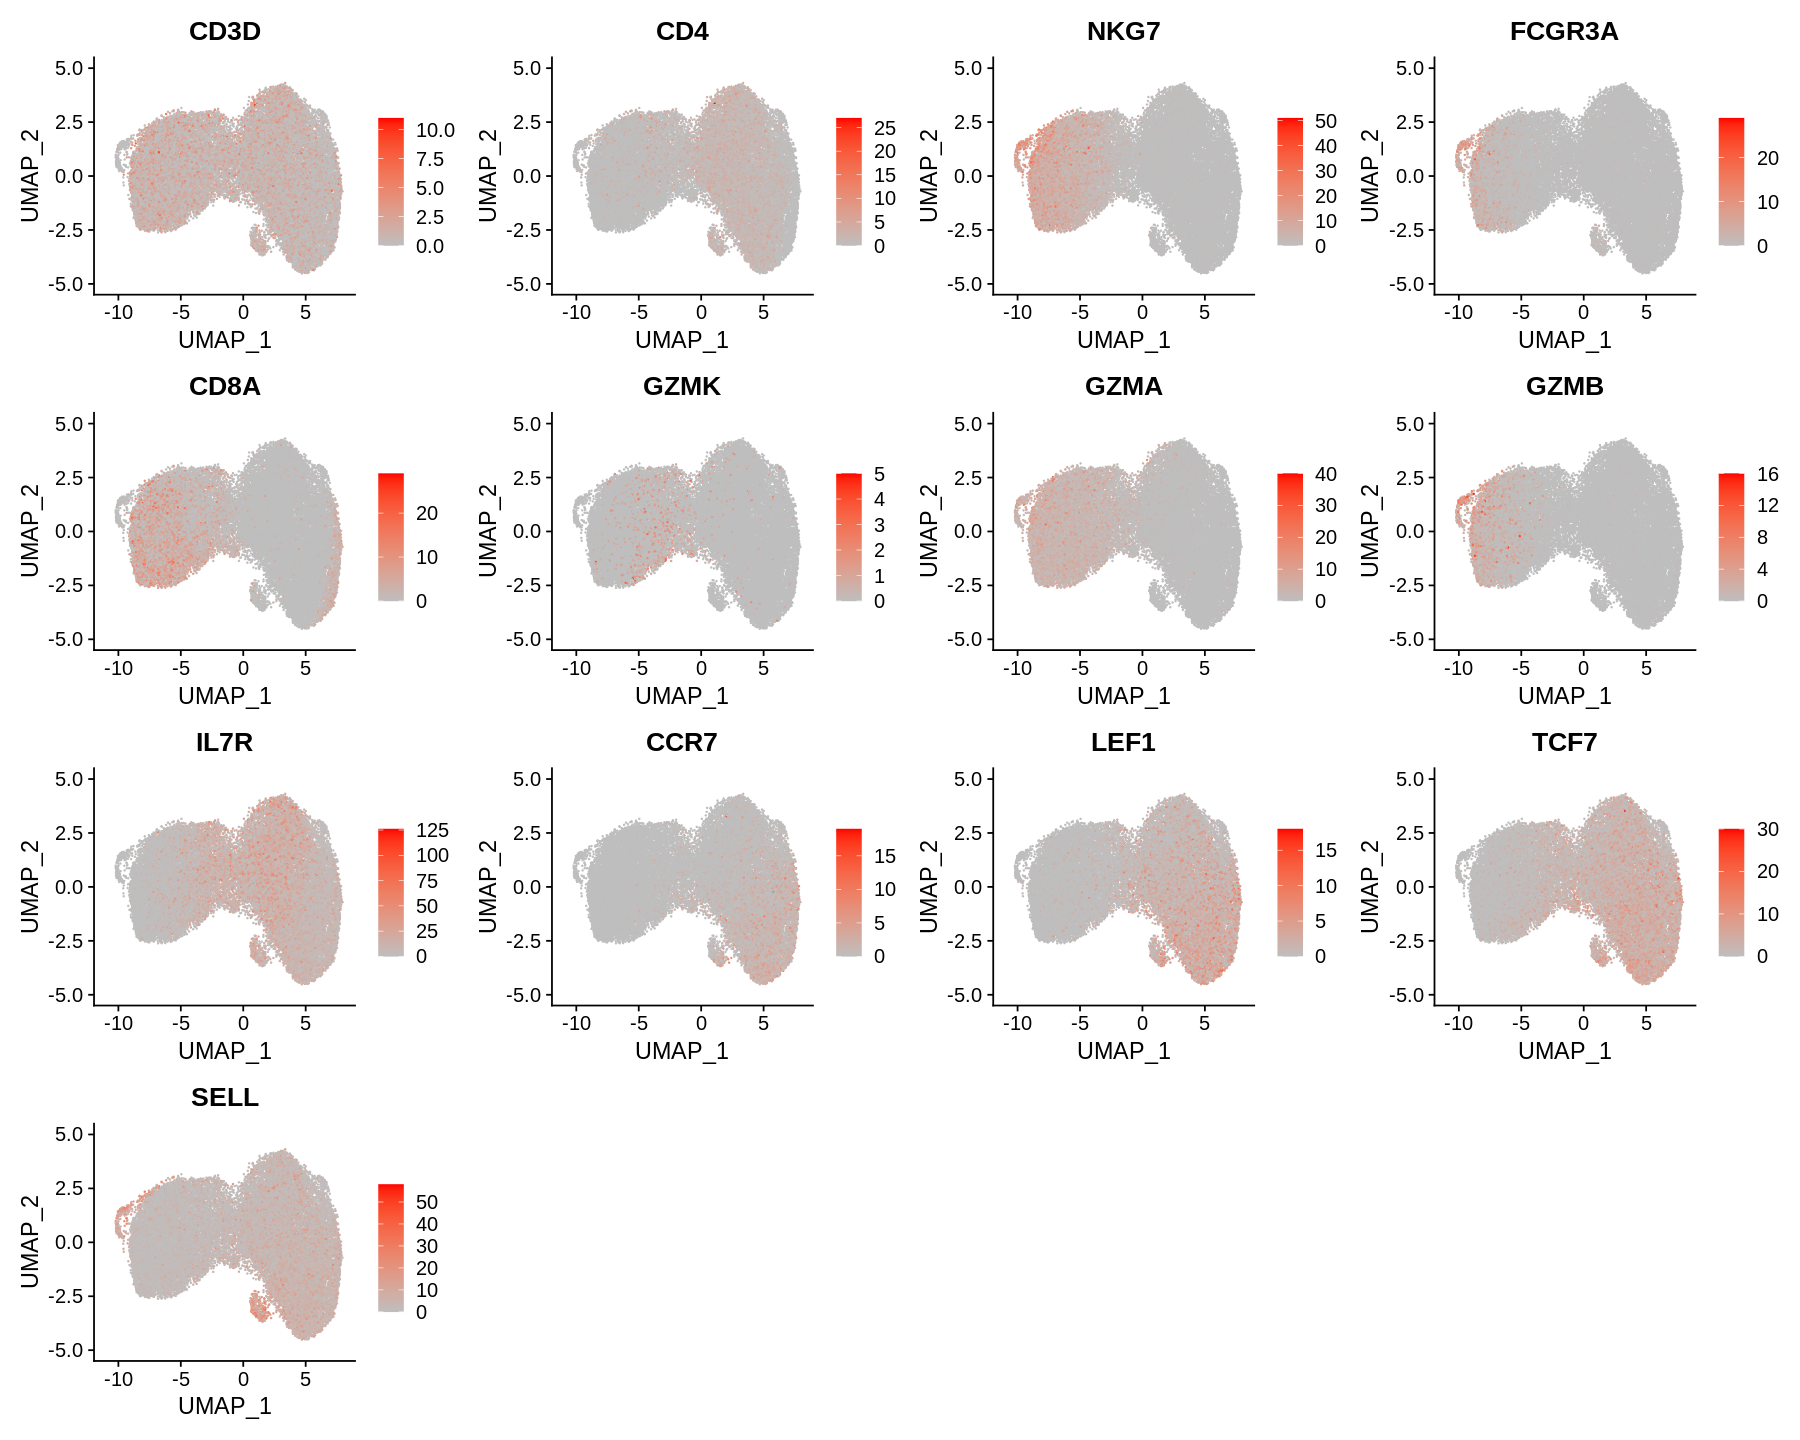

In [182]:
FeaturePlot(T,marker_genes,reduction = 'umap',cols = c('grey','red'))

In [183]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","feature_marker.pdf"),width =15, height = 12)
ggsave(paste0(outdir,"/","feature_marker.png"),width =15, height = 12)   

##### 细胞注释

In [201]:
CD8_effector = 0
CD4_naive_C1 = c(1,2,3)
CD4_naive_C2 = 4

In [204]:
Idents(T) = 'SCT_snn_res.0.3'

In [206]:
current.cluster.ids <- c(
  CD8_effector,CD4_naive_C1,CD4_naive_C2

)

new.cluster.ids <- c(rep("CD8_effector",length(CD8_effector)),
                     rep("CD4_naive_C1",length(CD4_naive_C1)),
                     rep("CD4_naive_C2",length(CD4_naive_C2))
)
T@meta.data$celltype <- plyr::mapvalues(x = as.integer(as.character(T@meta.data$SCT_snn_res.0.3)), from = current.cluster.ids, to = new.cluster.ids)

In [207]:
best_color<- c(
              "#00A087FF",
               "#4DBBD5FF","#3C5488FF","#0067A5",
               "#F38400","#A1CAF1", "#C2B280","#E68FAC",  
               "#F99379", "#604E97","#F6A600", "#B3446C","#DCD300",
               "#882D17", "#8DB600","#654522", "#E25822", "#2B3D26",
               "#191970","#000080",
               "#6495ED","#1E90FF","#00BFFF","#00FFFF","#FF1493",
               "#FF00FF","#A020F0","#63B8FF","#008B8B","#54FF9F",
               "#00FF00","#76EE00","#FFF68F","Yellow1","Gold1"
                )

In [208]:
options(repr.plot.height = 5,repr.plot.width = 5)

In [211]:
Idents(T) = 'celltype'

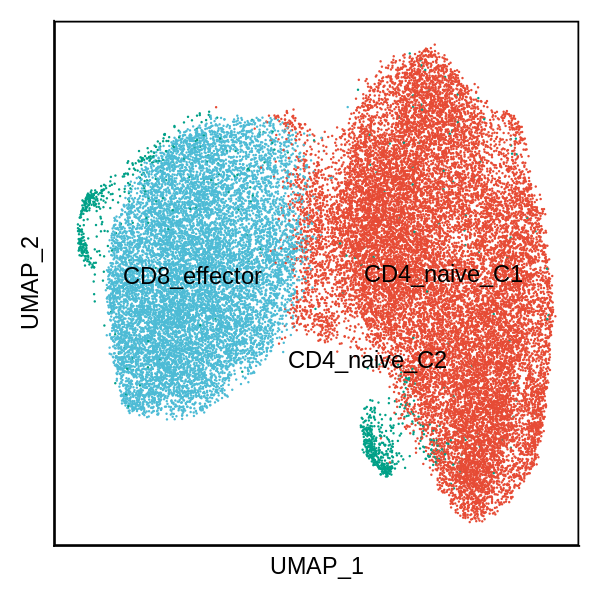

In [215]:
DimPlot(T, reduction = "umap",label = TRUE,label.size = 5) +NoLegend()+
  theme(panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank())+ scale_color_npg()

In [216]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","umap2.pdf"),width =5, height = 5)
ggsave(paste0(outdir,"/","umap2.png"),width =5, height = 5)   

In [103]:
table(T$`SCT_snn_res.0.3`)


    0     1     2     3     4 
11792  9259  7378  3316  1061 

In [104]:
Idents(T) = 'celltype'
allCells=names(Idents(T))
allType = levels(Idents(T))
choose_Cells = unlist(lapply(allType, function(x){
  cgCells = allCells[Idents(T)== x ]
  cg=sample(cgCells,800)
  cg
}))
cg_sce = T[, allCells %in% choose_Cells]

In [110]:
saveRDS(cg_sce,file = 'cg_sce.rds')

In [105]:
Idents(cg_sce) <- cg_sce@meta.data$SCT_snn_res.0.3

In [106]:
T_diff_markers <- FindAllMarkers(cg_sce, only.pos = TRUE, min.pct = 0.25,logfc.threshold=0.25)
write.csv(T_diff_markers, './T_diff_markers.csv')

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [111]:
source('../Inhouse_function/single_cell_GO_KEGG.r')

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(object$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
“0.45% of input gene IDs are fail to map...”


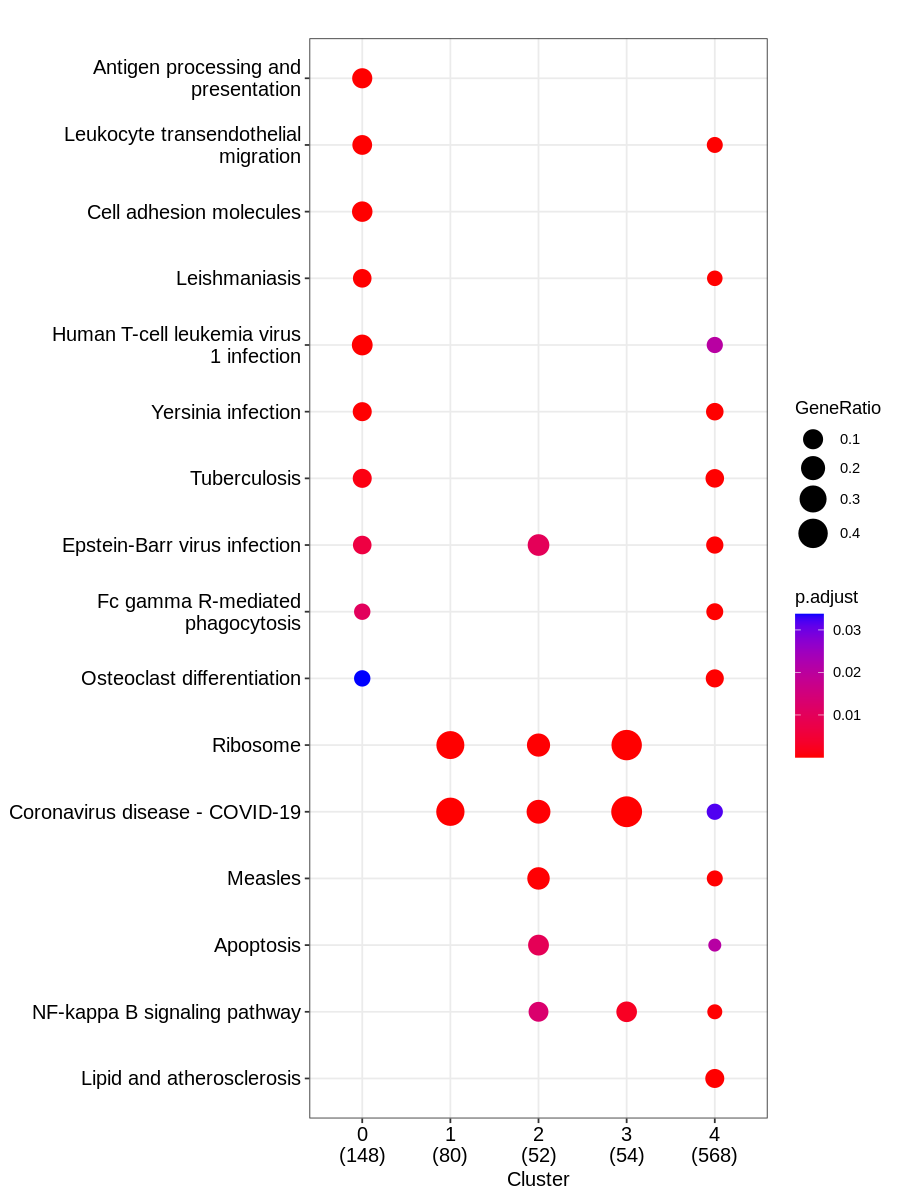

In [108]:
KEGG_anno(T_diff_markers)

In [184]:
KEGG_res = read.csv('./T_recluster/KEGG_result.csv')

In [185]:
top10 <- KEGG_res %>% group_by(Cluster) %>% top_n(8, rev(p.adjust))

In [187]:
options(repr.plot.height =6,repr.plot.width = 8)

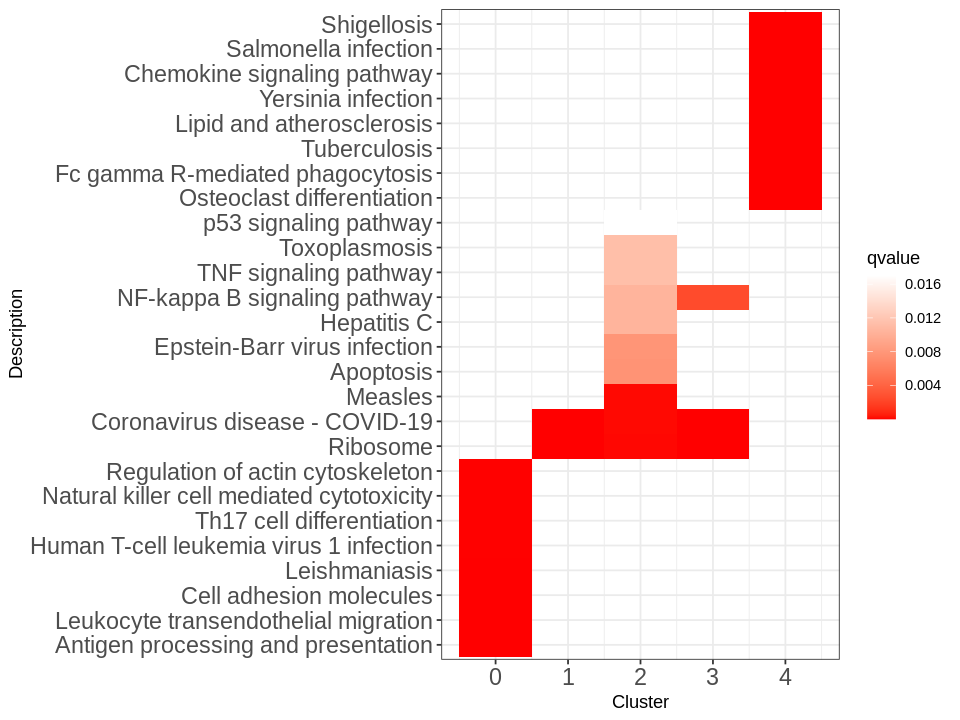

In [188]:
top10$Description<-factor(top10$Description,
                      levels = unique(top10$Description))
library(ggplot2)
ggplot(top10,aes(x=Cluster,y=Description))+
  geom_tile(aes(fill=qvalue)) + scale_fill_gradient(
   low="red",high = "white")+  #x轴标签
  theme_bw() + 
  theme(axis.text.y=element_text(size = 14))+
  theme(axis.text.x=element_text(size = 14))

In [189]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","KEGG_heatmap.pdf"),width =8, height = 6)
ggsave(paste0(outdir,"/","KEGG_heatmap.png"),width =8, height = 6)  

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(object$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
“0.45% of input gene IDs are fail to map...”


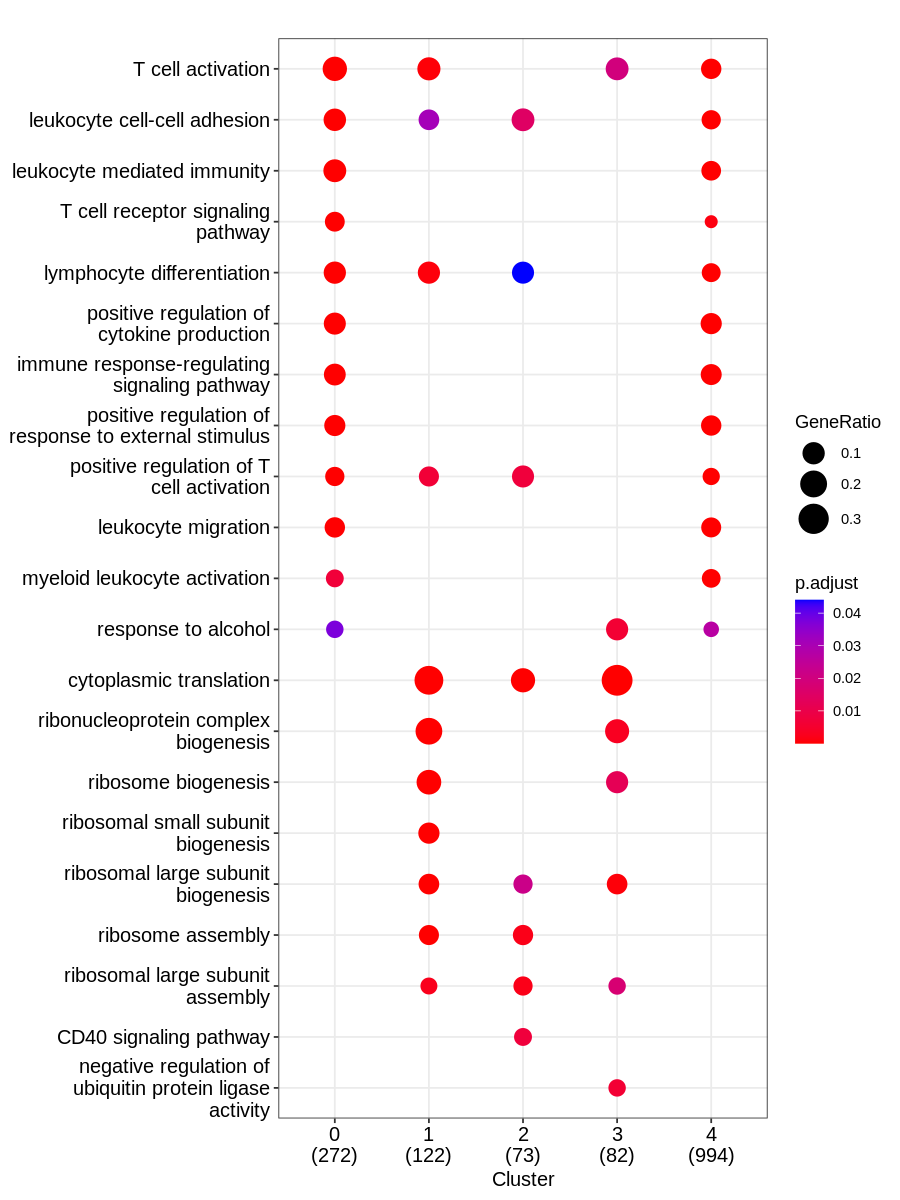

In [112]:
GO_anno(T_diff_markers)

In [190]:
go_res = read.csv('./T_recluster/GO_result.csv')

In [191]:
head(go_res,2)

,X,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,1,0,GO:0042110,T cell activation,38/272,487/18723,2.228721e-17,8.206153e-14,6.329569e-14,567/11119/868/6352/914/917/920/962/972/975/925/926/8320/2534/3113/3115/3122/3123/3659/3683/3936/4478/197358/5294/5573/26191/5873/8934/64926/864/54440/114836/57823/6693/30009/387357/7494/678,38
2,2,0,GO:0007159,leukocyte cell-cell adhesion,28/272,371/18723,1.069619e-12,1.969169e-09,1.518860e-09,567/868/6352/920/972/975/1524/7430/2534/64083/3113/3115/3122/3123/3659/3676/3683/3689/4478/5573/26191/64926/6093/864/54440/6693/30009/7494,28


In [ ]:
#go_res1 <- go_res %>% dplyr::filter(p.adjust < 0.05)

In [192]:
top10 <- go_res %>% group_by(Cluster) %>% top_n(8, rev(p.adjust))

In [198]:
options(repr.plot.height =9,repr.plot.width = 10)

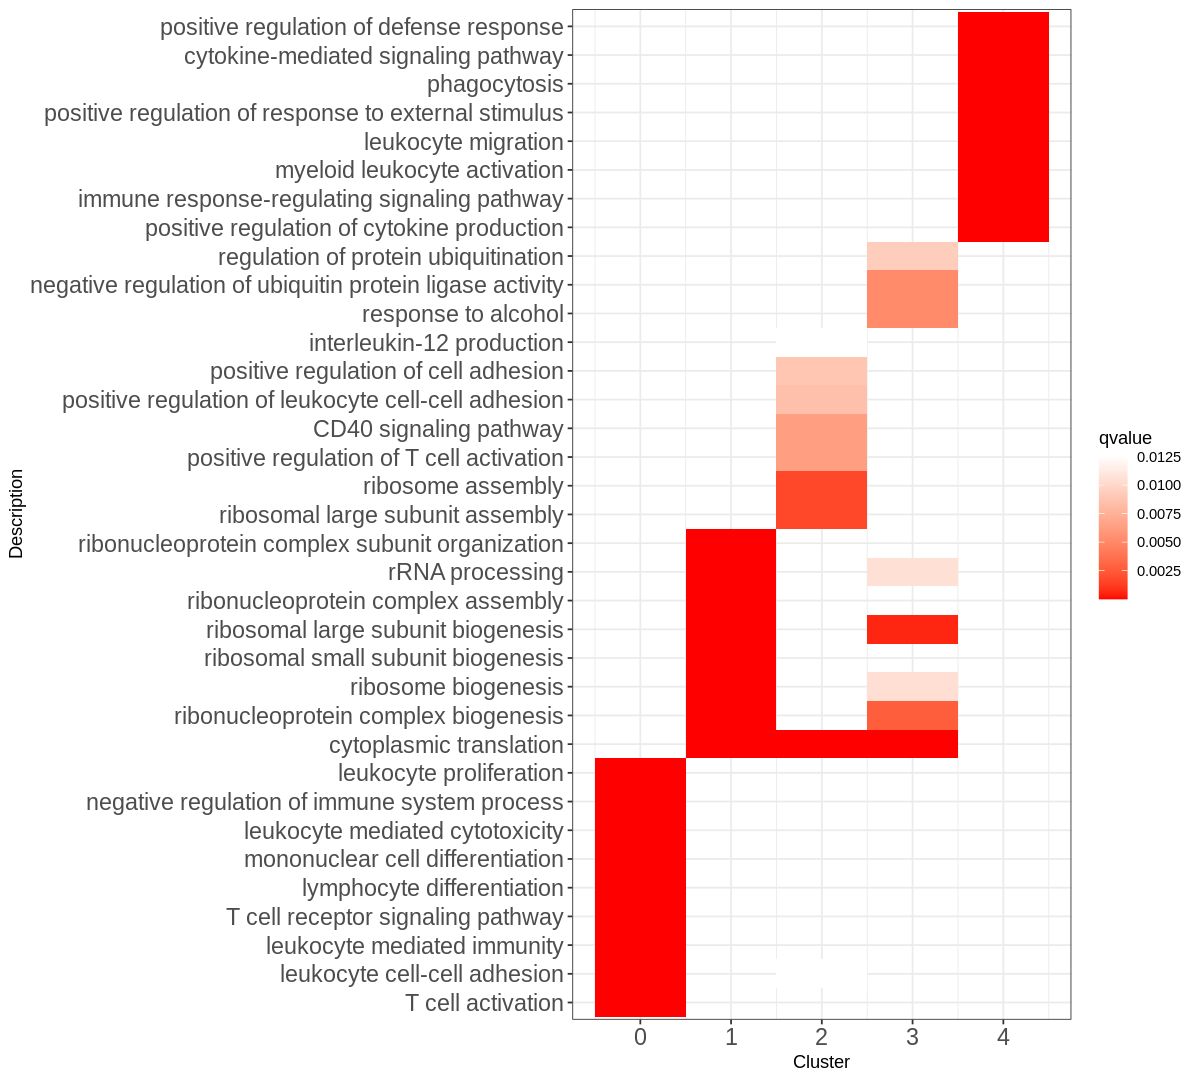

In [199]:
top10$Description<-factor(top10$Description,
                      levels = unique(top10$Description))
library(ggplot2)
ggplot(top10,aes(x=Cluster,y=Description))+
  geom_tile(aes(fill=qvalue)) + scale_fill_gradient(
   low="red",high = "white")+  #x轴标签
  theme_bw() + 
  theme(axis.text.y=element_text(size = 14))+
  theme(axis.text.x=element_text(size = 14))

In [200]:
outdir=paste('./',"T_recluster",sep="")
if(!file.exists(outdir)){
   dir.create(outdir)
}
ggsave(paste0(outdir,"/","GO_heatmap.pdf"),width =10, height = 9)
ggsave(paste0(outdir,"/","GO_heatmap.png"),width =10, height = 9)  

In [21]:
top10 <- T_diff_markers %>% group_by(cluster) %>% top_n(10, avg_log2FC)

In [24]:
library(ggplot2)

In [26]:
options(repr.plot.height = 5,repr.plot.width = 15)

$`0`
 [1] "CD74"    "PFN1"    "MT-CO1"  "CFL1"    "IL32"    "ACTB"    "TMSB4X" 
 [8] "PTMA"    "MT-CO2"  "MT-ATP6"

$`1`
 [1] "PABPC1" "RPL34"  "RPL23"  "RPL35A" "RPS14"  "RPL37"  "RPL38"  "RPS24" 
 [9] "MT-ND6" "MT-ND5"

$`2`
 [1] "AQP3"    "FMN1"    "MAP3K1"  "GSTK1"   "GATA3"   "TPT1"    "PBXIP1" 
 [8] "SPOCK2"  "FAM107B" "ITM2A"  

$`3`
 [1] "LTB"   "IL7R"  "RPLP1" "TAB2"  "PTPN4" "CD4"   "DPP4"  "BCL2"  "CYLD" 
[10] "RPS7" 

$`4`
 [1] "CXCR2"  "MNDA"   "SOD2"   "FCGR3B" "S100A9" "RGS2"   "IFITM2" "SRGN"  
 [9] "S100A8" "HSPA5"

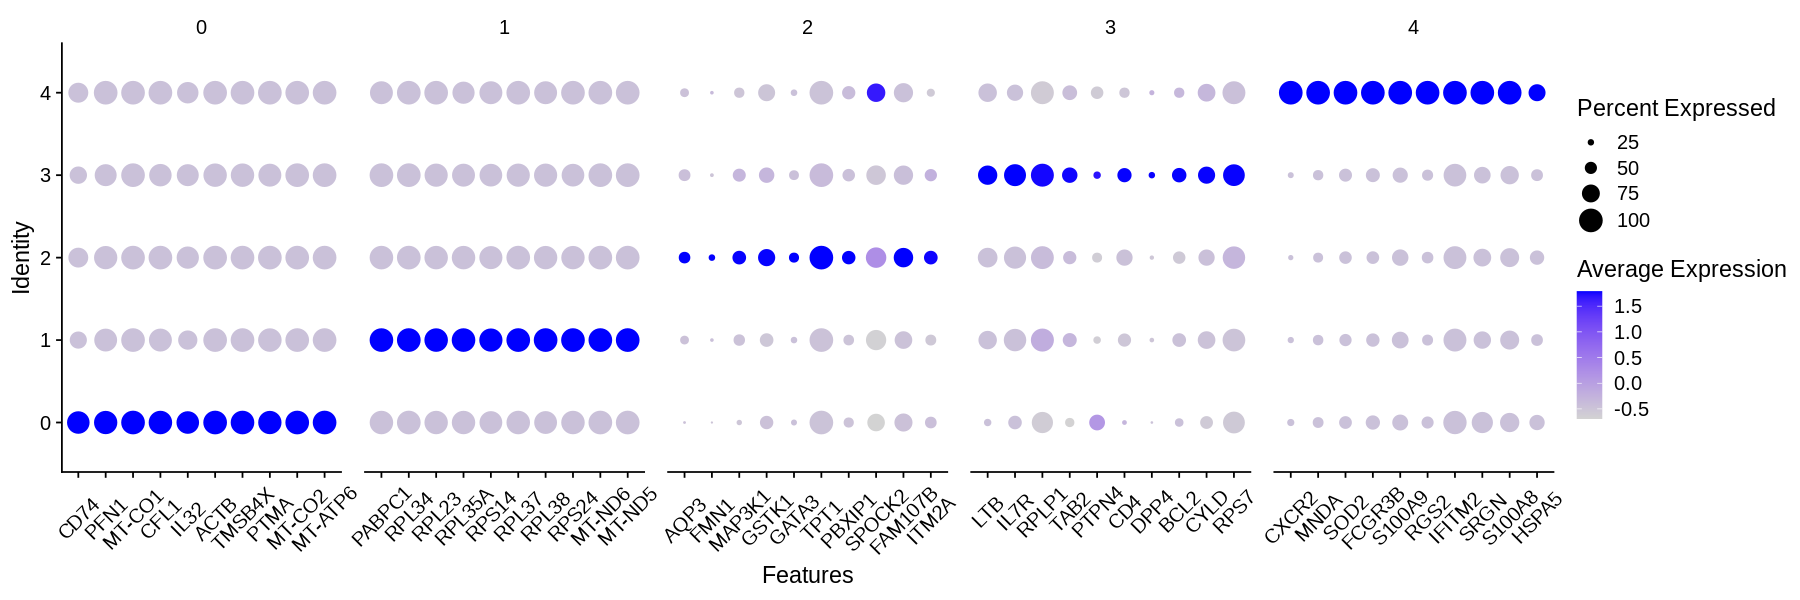

In [27]:
top10=top10[!duplicated(top10$gene),]
select_genes_all=split(top10$gene,top10$cluster)
select_genes_all
DotPlot(object = cg_sce, 
        features=select_genes_all, 
        assay = "RNA") + theme(axis.text.x = element_text(angle = 45, 
                                                          vjust = 0.5, hjust=0.5))
